In [1]:
import matplotlib.pyplot as plt
import iris
import numpy as np
import cartopy
import iris_sample_data

In [2]:
cube = iris.load('/Users/PDSB/PDSB_Project/data/oscar_vel1992.nc')

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning: Ignoring netCDF variable 'latitude' invalid units 'degrees-north'
  warnings.warn(msg)
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning:

In [3]:
print(cube)

0: Ocean Surface Meridional Currents / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)
1: Ocean Surface Zonal Currents / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)
2: Ocean Surface Zonal Currents Maximum Mask / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)
3: Ocean Surface Meridional Currents Maximum Mask / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)


In [39]:
ocean_surface_meridional_currents_maxmask = cube[0]
ocean_surface_zonal_currents_maxmask= cube[1]

In [40]:
ocean_surface_meridional_currents = cube[2]
ocean_surface_zonal_currents = cube[3]
print(ocean_surface_meridional_currents)

Ocean Surface Meridional Currents / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)
     Dimension coordinates:
          time                                       x          -            -               -
          depth                                      -          x            -               -
          latitude                                   -          -            x               -
          longitude                                  -          -            -               x
     Attributes:
          CREATION_DATE: 15:58 04-Apr-2017
          DATASUBTYPE: unfiltered
          DATATYPE: 1/72 YEAR Interval
          GEORANGE: 20 to 420 -80 to 80
          PERIOD: Oct.21,1992 to Dec.26,1992
          VARIABLE: Ocean Surface Currents
          company: Earth & Space Research, Seattle, WA
          contact: Kathleen Dohan (kdohan@esr.org)
          description: OSCAR Third Degree Sea Surface Velocity
          note1: Maximum Mask velocity is the geostrophic com

In [45]:
for coord in ocean_surface_meridional_currents.coords():
    print(coord.name())

time
depth
latitude
longitude


In [46]:
coord_names = [coord.name() for coord in ocean_surface_meridional_currents.coords()]
print(', '.join(sorted(coord_names)))

depth, latitude, longitude, time


In [47]:
print(coord.standard_name)

longitude


In [48]:
print(coord.long_name)

Longitude


In [49]:
print(coord.units)

unknown


In [50]:
print(type(coord.points))

<class 'numpy.ndarray'>


In [51]:
print(type(coord.bounds))

<class 'NoneType'>


In [52]:
# Extracting from a cube
equator_slice = ocean_surface_meridional_currents.extract(iris.Constraint(latitude=0))
# This selects every point where the latitude is zero (the equator), which also reduces the dimensionality of the cube  

In [53]:
print(equator_slice)

Ocean Surface Meridional Currents / (meter/sec) (time: 14; depth: 1; longitude: 1201)
     Dimension coordinates:
          time                                       x          -             -
          depth                                      -          x             -
          longitude                                  -          -             x
     Scalar coordinates:
          latitude: 0.0
     Attributes:
          CREATION_DATE: 15:58 04-Apr-2017
          DATASUBTYPE: unfiltered
          DATATYPE: 1/72 YEAR Interval
          GEORANGE: 20 to 420 -80 to 80
          PERIOD: Oct.21,1992 to Dec.26,1992
          VARIABLE: Ocean Surface Currents
          company: Earth & Space Research, Seattle, WA
          contact: Kathleen Dohan (kdohan@esr.org)
          description: OSCAR Third Degree Sea Surface Velocity
          note1: Maximum Mask velocity is the geostrophic component at all points + any...
          note2: Longitude extends from 20 E to 420 E to avoid a break in ma

In [54]:
equator_1D_slice = equator_lat_lon_slice.extract(iris.Constraint(latitude = 0)) # This is another method of indexing

NameError: name 'equator_lat_lon_slice' is not defined

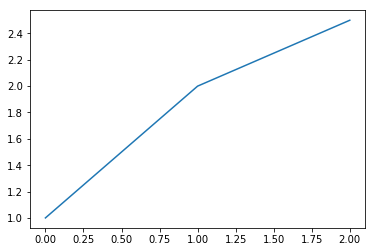

In [55]:
plt.plot([1,2,2.5])
plt.show()

In [56]:
plt.interactive(True)
plt.plot([1,2,2.5])
print(plt.isinteractive())
plt.close()

True


In [57]:
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)
import matplotlib.pyplot as plt
import iris
import iris.quickplot as qplt
import iris.plot as iplt

Ocean Surface Meridional Currents / (meter/sec) (latitude: 481; longitude: 1201)
     Dimension coordinates:
          latitude                                       x               -
          longitude                                      -               x
     Scalar coordinates:
          depth: 15.0 meter
          time: 1992-10-21 00:00:00
     Attributes:
          CREATION_DATE: 15:58 04-Apr-2017
          DATASUBTYPE: unfiltered
          DATATYPE: 1/72 YEAR Interval
          GEORANGE: 20 to 420 -80 to 80
          PERIOD: Oct.21,1992 to Dec.26,1992
          VARIABLE: Ocean Surface Currents
          company: Earth & Space Research, Seattle, WA
          contact: Kathleen Dohan (kdohan@esr.org)
          description: OSCAR Third Degree Sea Surface Velocity
          note1: Maximum Mask velocity is the geostrophic component at all points + any...
          note2: Longitude extends from 20 E to 420 E to avoid a break in major ocean basins....
          reference: Bonjean F. an

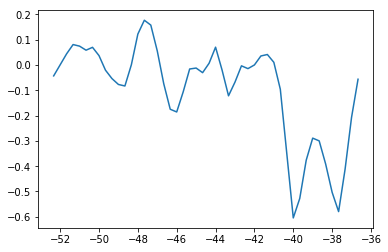

In [58]:
# time, depth, latitude, longitude 
ocean_1D = ocean_surface_meridional_currents[0,0,:,1]
iplt.plot(ocean_1D)
ocean_2D = ocean_surface_meridional_currents[0,0,:,:]
print(ocean_2D)

In [59]:
ocean_2D.shape

(481, 1201)

<a list of 40 text.Text objects>

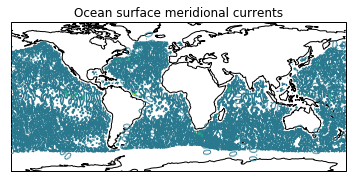

In [60]:
ocean_contour = qplt.contour(ocean_2D)
plt.gca().coastlines()
plt.clabel(ocean_contour, inline = True)

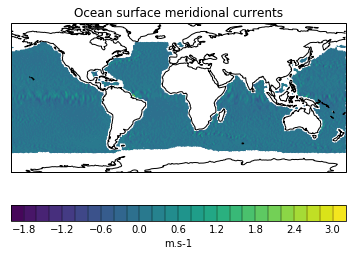

In [61]:
# This creates a contour plot all filled in like a heat map
qplt.contourf(ocean_2D, 25)
plt.gca().coastlines()
plt.show()

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


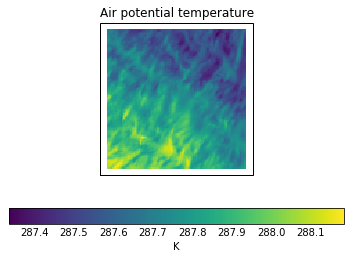

In [62]:
fname = iris.sample_data_path('hybrid_height.nc')
temperature_cube = iris.load_cube(fname, iris.Constraint(model_level_number = 1))
qplt.pcolormesh(temperature_cube)

In [63]:
import matplotlib.cm as mpl_cm
import matplotlib.pyplot as plt

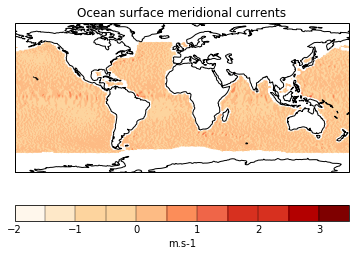

In [64]:
# Plotting with Brewer
brewer_cmap = mpl_cm.get_cmap('brewer_OrRd_09') # This loads the cynthia brewer paletta
qplt.contourf(ocean_2D, brewer_cmap.N, cmap = brewer_cmap)
plt.gca().coastlines()

In [65]:
sample_points = [('latitude', 51.48), ('longitude', 0)]
print(air_temp.interpolate(sample_points, iris.analysis.Linear()))

NameError: name 'air_temp' is not defined

In [66]:
result = air_temp.interpolate([('longitude', 0)], iris.analysis.Linear())
print('Original: ' + air_temp.summary(shorten = True))


NameError: name 'air_temp' is not defined

In [67]:
print('Interpolated: ' + result.summary(shorten = True))

NameError: name 'result' is not defined

In [91]:
air_temp = iris.load_cube(iris.sample_data_path('air_temp.pp'))
sample_points = [('longitude', np.linspace(-11, 2, 14)),
                ('latitude', np.linspace(8, 60, 13))]
result = air_temp.interpolate(sample_points, iris.analysis.Linear())
print(result.summary(shorten = True))
# np.linspace (start, stop, number of steps) its evenly spaced

air_temperature / (K)               (latitude: 13; longitude: 14)


<a list of 8 text.Text objects>

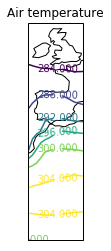

In [92]:
ocean_contour = qplt.contour(result)
plt.gca().coastlines()
plt.clabel(ocean_contour)
## Interpolating in this way allowed me to get a subset of the map

In [70]:
## Doesnt just have to be over coordinates can also be over any other non-horizontal coordinate
cube = iris.load_cube(iris.sample_data_path('hybrid_height.nc'), 'air_potential_temperature')

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [71]:
column = cube[:, 0,0]

In [72]:
print(column.summary(shorten = True))

air_potential_temperature / (K)     (model_level_number: 15)


In [73]:
print(column.coord('altitude').points)
# This cube has a hybrid height vertical coordinate system so that the vertical coordinate is unevenly spaced in altitude 
# To fix that, we can regularlise the vertical coordinate by defining 10 equally spaced altitude sample points 

[ 418.69836  434.5705   456.7928   485.3665   520.2933   561.5752
  609.2145   663.2141   723.57697  790.30664  863.4072   942.8823
 1028.737   1120.9764  1219.6051 ]


In [74]:
sample_points = [('altitude', np.linspace(400, 1250, 10))]
new_column = column.interpolate(sample_points, iris.analysis.Linear())
print(new_column.summary(shorten = True))

air_potential_temperature / (K)     (model_level_number: 10)


In [75]:
global_air_temp = iris.load_cube(iris.sample_data_path('air_temp.pp'))

In [76]:
rotated_psl = iris.load_cube(iris.sample_data_path('rotated_pole.nc'))

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [77]:
print(currents)

NameError: name 'currents' is not defined

In [78]:
new = currents.merge()

NameError: name 'currents' is not defined

In [79]:
print(new)

NameError: name 'new' is not defined

In [80]:
import cartopy.crs as ccrs

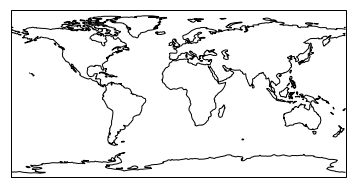

In [81]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()

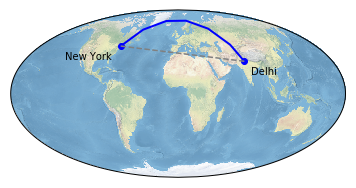

In [82]:
ax = plt.axes(projection = ccrs.Mollweide())
ax.stock_img()
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61
plt.plot([ny_lon, delhi_lon],[ny_lat, delhi_lat],
         color = 'blue', linewidth = 2, marker = 'o',
         transform = ccrs.Geodetic(),)
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
        color = 'gray', linestyle = '--', 
        transform = ccrs.PlateCarree(),)
plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


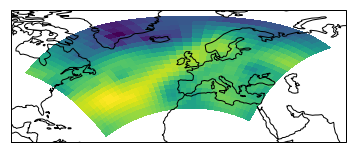

In [83]:
# load some sample iris data
fname = iris.sample_data_path('rotated_pole.nc')
temperature = iris.load_cube(fname)

# iris comes complete with a method to put bounds on a simple point
# coordinate. This is very useful...
temperature.coord('grid_latitude').guess_bounds()
temperature.coord('grid_longitude').guess_bounds()

# turn the iris Cube data structure into numpy arrays
gridlons = temperature.coord('grid_longitude').contiguous_bounds()
gridlats = temperature.coord('grid_latitude').contiguous_bounds()
temperature = temperature.data

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
plt.pcolormesh(gridlons, gridlats, temperature, transform=rotated_pole)

ax.coastlines()

plt.show()

In [84]:
ocean_2D.coord('latitude').guess_bounds()
ocean_2D.coord('longitude').guess_bounds()

Ocean Surface Meridional Currents / (meter/sec) (latitude: 481; longitude: 1201)
     Dimension coordinates:
          latitude                                       x               -
          longitude                                      -               x
     Scalar coordinates:
          depth: 15.0 meter
          time: 1992-10-21 00:00:00
     Attributes:
          CREATION_DATE: 15:58 04-Apr-2017
          DATASUBTYPE: unfiltered
          DATATYPE: 1/72 YEAR Interval
          GEORANGE: 20 to 420 -80 to 80
          PERIOD: Oct.21,1992 to Dec.26,1992
          VARIABLE: Ocean Surface Currents
          company: Earth & Space Research, Seattle, WA
          contact: Kathleen Dohan (kdohan@esr.org)
          description: OSCAR Third Degree Sea Surface Velocity
          note1: Maximum Mask velocity is the geostrophic component at all points + any...
          note2: Longitude extends from 20 E to 420 E to avoid a break in major ocean basins....
          reference: Bonjean F. an

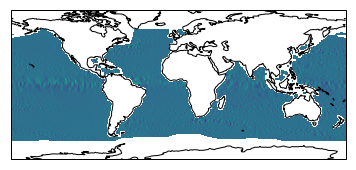

In [85]:
print(ocean_2D)


gridlons = ocean_2D.coord('longitude').contiguous_bounds()
gridlats = ocean_2D.coord('latitude').contiguous_bounds()
ocean = ocean_2D.data
#setting up a map
ax = plt.axes(projection = ccrs.PlateCarree())
rotated_pole = ccrs.RotatedPole(pole_longitude = 170, pole_latitude = 40)
plt.pcolormesh(gridlons, gridlats, ocean)
ax.coastlines()

In [86]:
ocean_surface_zonal_currents

<iris 'Cube' of Ocean Surface Zonal Currents Maximum Mask / (meter/sec) (time: 14; depth: 1; latitude: 481; longitude: 1201)>

In [87]:
ocean_1D

<iris 'Cube' of Ocean Surface Meridional Currents / (meter/sec) (latitude: 481)>

In [88]:
import requests
latlink = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg//oscar_vel1992.nc.gz.ascii?latitude[0:1:480]"
longlink = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg//oscar_vel1992.nc.gz.ascii?longitude[0:1:1200]"
lat = requests.get(latlink)
latlist = lat.text.split(",")
latitude = np.asarray(latlist[1:])
len(latitude)
long = requests.get(longlink)
longlist= long.text.split(",")
longitude = np.asarray(longlist[1:])
type(longitude)
u_data = np.asarray(ocean_surface_meridional_currents.data)

In [89]:
ulink = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg//oscar_vel1992.nc.gz.ascii?u[0:1:13][0:1:0][0:1:480][0:1:1200]"
ud = requests.get(ulink)
ulist = ud.text.split(",")
udata = np.asarray(ulist[1:])


In [12]:
vlink = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg//oscar_vel1992.nc.gz.ascii?v[0:1:13][0:1:0][0:1:480][0:1:1200]"
vd= requests.get(vlink)
vist = vd.text.split(",")
vdata = np.asarray(vist[1:])

In [13]:
vdata.shape
udata.shape
longitude.shape
latitude.shape

(481,)

In [38]:
meridonal_2D = ocean_surface_meridional_currents[0,0,:,:].data
zonal_2D = ocean_surface_zonal_currents[0,0,:,:].data
v_direction =zonal_2D.data
u_direction = meridonal_2D.data
type(v_direction)
u_direction.dtype

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\netcdf.py:395: RuntimeWarning: invalid value encountered in greater
  var = variable[keys]


dtype('float64')

In [94]:
meridonal_2D = ocean_surface_meridional_currents[0,0,0:100,:].data
zonal_2D = ocean_surface_zonal_currents[0,0,0:100,:].data

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\netcdf.py:395: RuntimeWarning: invalid value encountered in greater
  var = variable[keys]


In [95]:
meridonal_2D.shape

(100, 1201)

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\cartopy\mpl\geoaxes.py:1744: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\cartopy\mpl\geoaxes.py:1744: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\cartopy\mpl\geoaxes.py:1744: RuntimeWarning: invalid value encountered in subtract
  u, v = self.projection.transform_vectors(t, x, y, u, v)


TypeError: unhashable type: 'numpy.ndarray'

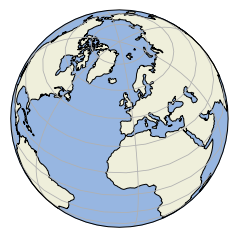

In [33]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def sample_data(shape=(481, 1201)):
    """
    Return ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = longitude
    y = latitude

    x2d, y2d = np.meshgrid(x, y)
    u = cats
    v = dogs

    return x, y, u, v, crs


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    x, y, u, v, vector_crs = sample_data()
    ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
x = longitude
y = latitude
x2d, y2d = np.meshgrid(x, y)
x2d.shape